In [3]:
import numpy as np

class Perceptron:
    """Perceptron Classifier
    ------------------------
    A simple binary classifier that learns a decision boundary using
    the Perceptron learning algorithm.

    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0). Determines how much weights
        are updated after each misclassification.

    n_iter : int
        Number of passes (epochs) over the training dataset.

    random_state : int
        Seed for random weight initialization to ensure reproducibility.

    Attributes
    ----------
    w_ : ndarray
        Weight vector after training.

    b_ : float
        Bias term.

    errors_ : list
        Number of misclassified samples in each epoch.
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        """
        Constructor for initializing the perceptron with user-defined parameters.

        Parameters
        ----------
        eta : float
            Learning rate (default = 0.01)
        n_iter : int
            Number of epochs (default = 50)
        random_state : int
            Random seed for reproducibility (default = 1)
        """
        self.eta = eta  # Store the learning rate
        self.n_iter = n_iter  # Store the number of epochs
        self.random_state = random_state  # Store the random seed

    def fit(self, X, y):
        """
        Train the perceptron on the dataset.

        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            The training dataset where each row is a sample and each column
            is a feature.

        y : array-like, shape = [n_samples]
            The target labels (0 or 1).

        Returns
        -------
        self : object
            Returns the trained perceptron model.
        """

        # Step 1: Create a random number generator for reproducibility
        rgen = np.random.RandomState(self.random_state)

        # Step 2: Initialize weights randomly using a normal distribution
        # Small random values prevent large weight updates initially
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])

        # Step 3: Initialize the bias term to zero
        self.b_ = np.float_(0.)

        # Step 4: Create an empty list to track misclassification errors per epoch
        self.errors_ = []

        # Training loop: Iterate through the dataset multiple times (epochs)
        for _ in range(self.n_iter):
            errors = 0  # Count misclassified points for this epoch

            for xi, target in zip(X, y):
                """
                xi -> One training sample (features)
                target -> Corresponding label (actual class)
                """

                # Step 5: Compute the weight update using the perceptron learning rule
                update = self.eta * (target - self.predict(xi))

                # Step 6: Update the weight vector
                self.w_ += update * xi  # Adjust weights based on the error

                # Step 7: Update the bias term
                self.b_ += update

                # Step 8: Count the number of updates (misclassified points)
                errors += int(update != 0.0)  # Misclassification occurs if update ≠ 0

            # Step 9: Store the total errors for this epoch
            self.errors_.append(errors)

        return self  # Return the perceptron instance

    def net_input(self, X):
        """
        Compute the weighted sum (z = w·x + b).

        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            Input data.

        Returns
        -------
        float
            The net input value.
        """
        return np.dot(X, self.w_) + self.b_  # Compute linear combination

    def predict(self, X):
        """
        Predict the class label (0 or 1) for input X.

        Parameters
        ----------
        X : array-like, shape = [n_samples, n_features]
            New data points.

        Returns
        -------
        int
            Predicted class label (0 or 1).
        """
        return np.where(self.net_input(X) >= 0.0, 1, 0)  # Apply step function


In [6]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) *np.linalg.norm(v2)))


0.0

In [7]:
import pandas as pd # pandas can we used for datavisualization
s= 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [11]:
df=pd.read_csv(s,header=None,encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


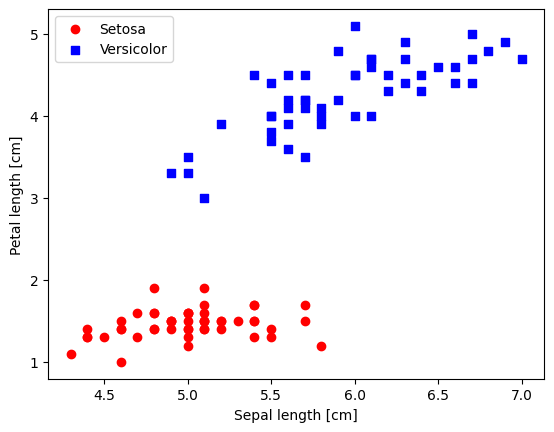

In [14]:
# Import necessary libraries
import matplotlib.pyplot as plt  # For plotting graphs
import numpy as np  # For numerical operations

# Select the target labels (species)
# Extracts the species column (5th column) for the first 100 rows
y = df.iloc[0:100, 4].values

# Convert species names into numerical values:
# If the species is 'Iris-setosa', assign 0
# If the species is not 'Iris-setosa' (i.e., 'Iris-versicolor'), assign 1
y = np.where(y == 'Iris-setosa', 0, 1)

# Select features for plotting (sepal length and petal length)
# Extracts two features from the dataset:
# Column 0 -> Sepal length (X-axis feature)
# Column 2 -> Petal length (Y-axis feature)
X = df.iloc[0:100, [0, 2]].values

# Create a scatter plot for Iris-setosa (first 50 samples)
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')  # Red circles for Setosa

# Create a scatter plot for Iris-versicolor (next 50 samples)
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')  # Blue squares for Versicolor

# Label the axes
plt.xlabel('Sepal length [cm]')  # X-axis label
plt.ylabel('Petal length [cm]')  # Y-axis label

# Add a legend in the upper-left corner to distinguish species
plt.legend(loc='upper left')

# Display the plot
plt.show()


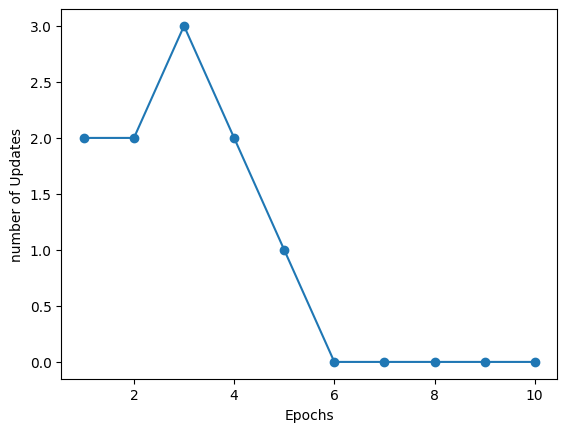

In [15]:
#Using the above created perceptron function to see the drop of the epoches
ppn = Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('number of Updates')
plt.show()

In [19]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
 # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
 # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

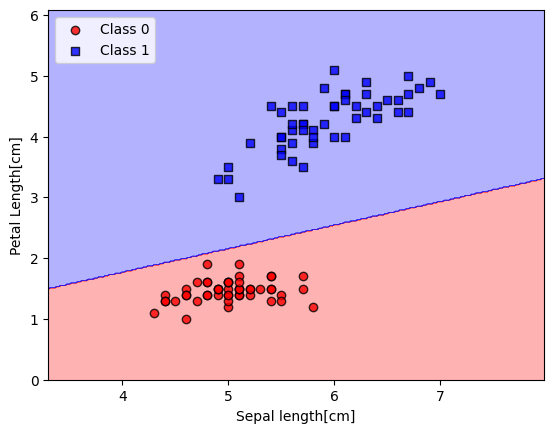

In [20]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('Sepal length[cm]')
plt.ylabel('Petal Length[cm]')
plt.legend(loc='upper left')
plt.show()